In [3]:
import pandas as pd
import matplotlib.pyplot as plt
! pip install seaborn 

     |████████████████████████████████| 292 kB 4.6 MB/s eta 0:00:01


In [4]:
import seaborn as sns
heart_stroke = pd.read_csv("healthcare-dataset-stroke-.csv.csv")
heart_stroke.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### Cleaning data

In [5]:
heart_stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
heart_stroke.fillna(heart_stroke['bmi'].mean(), inplace=True)
heart_stroke.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [7]:
heart_stroke.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
s_active = heart_stroke[heart_stroke['stroke'] == 1]
s_inactive = heart_stroke[heart_stroke['stroke'] == 0]

In [9]:
active_age = pd.DataFrame(s_active["age"])
inactive_age = pd.DataFrame(s_inactive["age"])

active_age.head()

,age
0,67.0
1,61.0
2,80.0
3,49.0
4,79.0


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Rate of getting Heart stroke')]

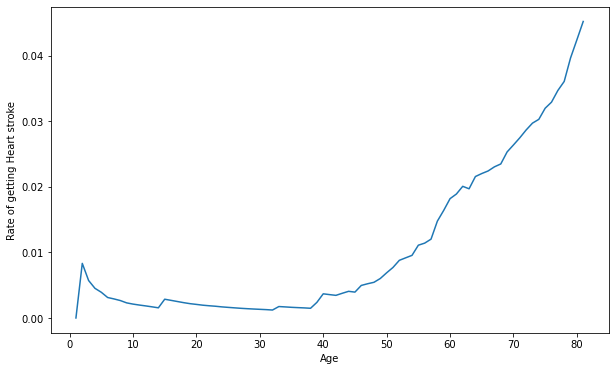

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

heart_stroke['age'] = heart_stroke['age'].astype(int)

rate = []
for i in range(heart_stroke['age'].min(), heart_stroke['age'].max()):
    rate.append(heart_stroke[heart_stroke['age'] < i]['stroke'].sum() / len(heart_stroke[heart_stroke['age'] < i]['stroke']))

sns.lineplot(data=rate ,ax=ax);

ax.set(xlabel = 'Age', ylabel='Rate of getting Heart stroke')

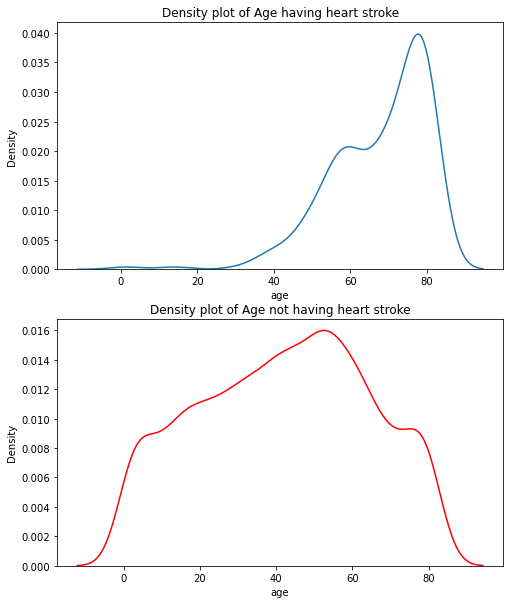

In [11]:
# KERNEL DISTRIBUTION PLOT
# giveS the probability density

fig, ax = plt.subplots(nrows=2, 
                       ncols=1, 
                       figsize=(8, 10))


ax[0].set(title='Density plot of Age having heart stroke')
sns.kdeplot(active_age["age"], label="Active", ax=ax[0])


ax[1].set(title='Density plot of Age not having heart stroke')
sns.kdeplot(inactive_age["age"],label="Inactive", ax=ax[1], color="red");

In [12]:
# active_smoke is smoking column hacving heart stroke = 1
# inactive_smoke is smoking column hacving heart stroke = 0

active_smoke = pd.DataFrame(s_active["smoking_status"].value_counts())

active_smoke["Percentage"] = active_smoke["smoking_status"].apply(lambda x: x/sum(active_smoke["smoking_status"])*100)

active_smoke

,smoking_status,Percentage
never smoked,90,36.144578
formerly smoked,70,28.112450
Unknown,47,18.875502
smokes,42,16.867470


In [13]:
inactive_smoke = pd.DataFrame(s_inactive['smoking_status'].value_counts())

inactive_smoke["Percentage"] = inactive_smoke["smoking_status"].apply(lambda x: x/sum(inactive_smoke["smoking_status"])*100)

inactive_smoke

,smoking_status,Percentage
never smoked,1802,37.070562
Unknown,1497,30.796132
formerly smoked,815,16.766098
smokes,747,15.367208


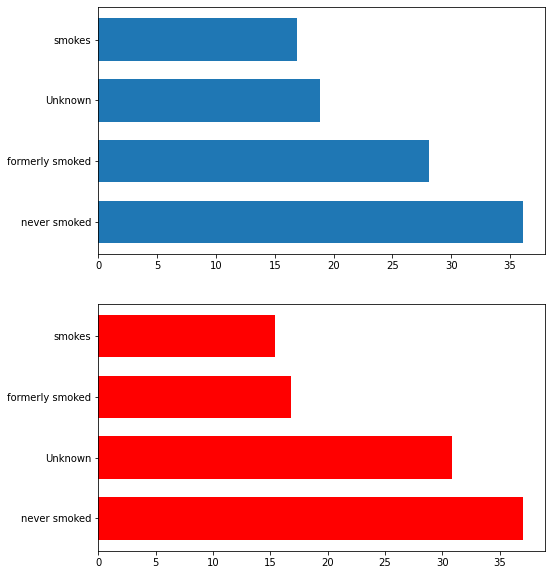

In [14]:
fig, ax = plt.subplots(nrows=2,
                      ncols=1,
                      figsize=(8, 10))

ax[0].barh(active_smoke.index, active_smoke['Percentage'], height=0.7)

ax[1].barh(inactive_smoke.index, inactive_smoke['Percentage'], height=0.7, color='red');


In [15]:
! pip install plotly
! pip install cufflinks

import plotly as ps
import cufflinks as cf

     |████████████████████████████████| 23.9 MB 2.1 MB/s eta 0:00:01��███▌  | 22.0 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 3.1 MB/s eta 0:00:011


  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67917 sha256=900c65f94e43bfe5cdb229b6f9b2e9980256690185d20b33827e5db0545915e0
  Stored in directory: /home/jovyan/.cache/pip/wheels/1c/db/ce/70cf35eb5a61b9ea3d34434072a8821dddc4f21eb5127e5415
Successfully built cufflinks


In [22]:
ps.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [17]:
import plotly.express as px

In [18]:
px.pie(heart_stroke, values='stroke', names="gender")

In [19]:
px.pie(heart_stroke, values='stroke', names="smoking_status")

In [20]:
px.pie(heart_stroke, values='stroke', names="ever_married")

In [21]:
px.pie(heart_stroke, values='stroke', names="work_type")

## Model Preparation (RandomforestClassifier)

In [19]:
from sklearn.model_selection import train_test_split

x = heart_stroke.drop('stroke', axis=1)

y = heart_stroke['stroke']


In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [21]:
heart_stroke.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [22]:
encoder = OneHotEncoder()

categorized_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

tr = ColumnTransformer([('encoder', encoder, categorized_features)])

t_x = tr.fit_transform(x)

t_x

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(t_x , y, test_size=0.2)

In [24]:
from sklearn.ensemble import RandomForestClassifier

mod = RandomForestClassifier()

mod.fit(x_train, y_train)

mod.score(x_test, y_test)

0.9549902152641878

In [25]:
a = y_test

pd.DataFrame(a).head(10)

,stroke
756,0
3465,0
636,0
889,0
3764,0
1795,0
4716,0
4552,0
3967,0
1680,0


In [26]:
b = mod.predict(x_test)

pd.DataFrame(b).head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [27]:
import numpy as np
arr1 = np.array(a.all())
arr2 = np.array(b.all())

if arr1==arr2:
    print('Model is Working !')

Model is Working !


## model 2 logistic regression

In [28]:
heart_stroke['gender'] = heart_stroke['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
heart_stroke['Residence_type'] = heart_stroke['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
heart_stroke['work_type'] = heart_stroke['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)

## spliting data 

In [29]:
X  = heart_stroke[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']]
y = heart_stroke['stroke']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [30]:
X_test.head(3)

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi
4688,0,31,0,0,1,64.85,23.0
4478,0,40,0,0,1,65.29,28.3
3849,1,8,0,0,255,74.42,22.5


In [31]:
! pip install imbalanced-learn


     |████████████████████████████████| 189 kB 13.1 MB/s eta 0:00:01


In [50]:
import imblearn
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

## SMOTE Techniques for Oversampling  Imbalance Data

In [51]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
sample = SMOTE()
X_train_1, y_train_1 =sample.fit_resample(X_train, y_train.ravel())

In [52]:
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])

In [53]:
logreg_cv = cross_val_score(logreg_pipeline,X_train_1,y_train_1,cv=10,scoring='f1')

In [54]:
print('Logistic Regression mean :',cross_val_score(logreg_pipeline,X_train_1,y_train_1,cv=10,scoring='f1').mean())

Logistic Regression mean : 0.8249824460155948


In [55]:

penalty = ['l1','l2']
C = [0.001, 0.01, 0.1, 1, 10, 100] 

log_param_grid = {'penalty': penalty, 
                  'C': C}
logreg = LogisticRegression()
grid = GridSearchCV(logreg,log_param_grid)


In [56]:
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(C=0.1,penalty='l2',random_state=42))])

logreg_pipeline.fit(X_train_1,y_train_1)

#logreg.fit(X_train_1,y_train_1)

logreg_tuned_pred   = logreg_pipeline.predict(X_test)

In [57]:
from sklearn.metrics import plot_confusion_matrix, classification_report,accuracy_score,f1_score
print(classification_report(y_test,logreg_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,logreg_tuned_pred))
print('F1 Score: ',f1_score(y_test,logreg_tuned_pred))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85      3404
           1       0.11      0.61      0.19       173

    accuracy                           0.75      3577
   macro avg       0.54      0.68      0.52      3577
weighted avg       0.93      0.75      0.82      3577

Accuracy Score:  0.7528655297735533
F1 Score:  0.1919561243144424
